<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/titanic2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Titanic 데이터를 대상으로 모델링을 진행합니다.
- kNN 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [458]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [460]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [464]:
# 상/하위 몇 개 행 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [466]:
# 하위 몇 개 행 확인
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [468]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [470]:
# 기술통계 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [472]:
# 상관관계 확인
data.corr(numeric_only=True).style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


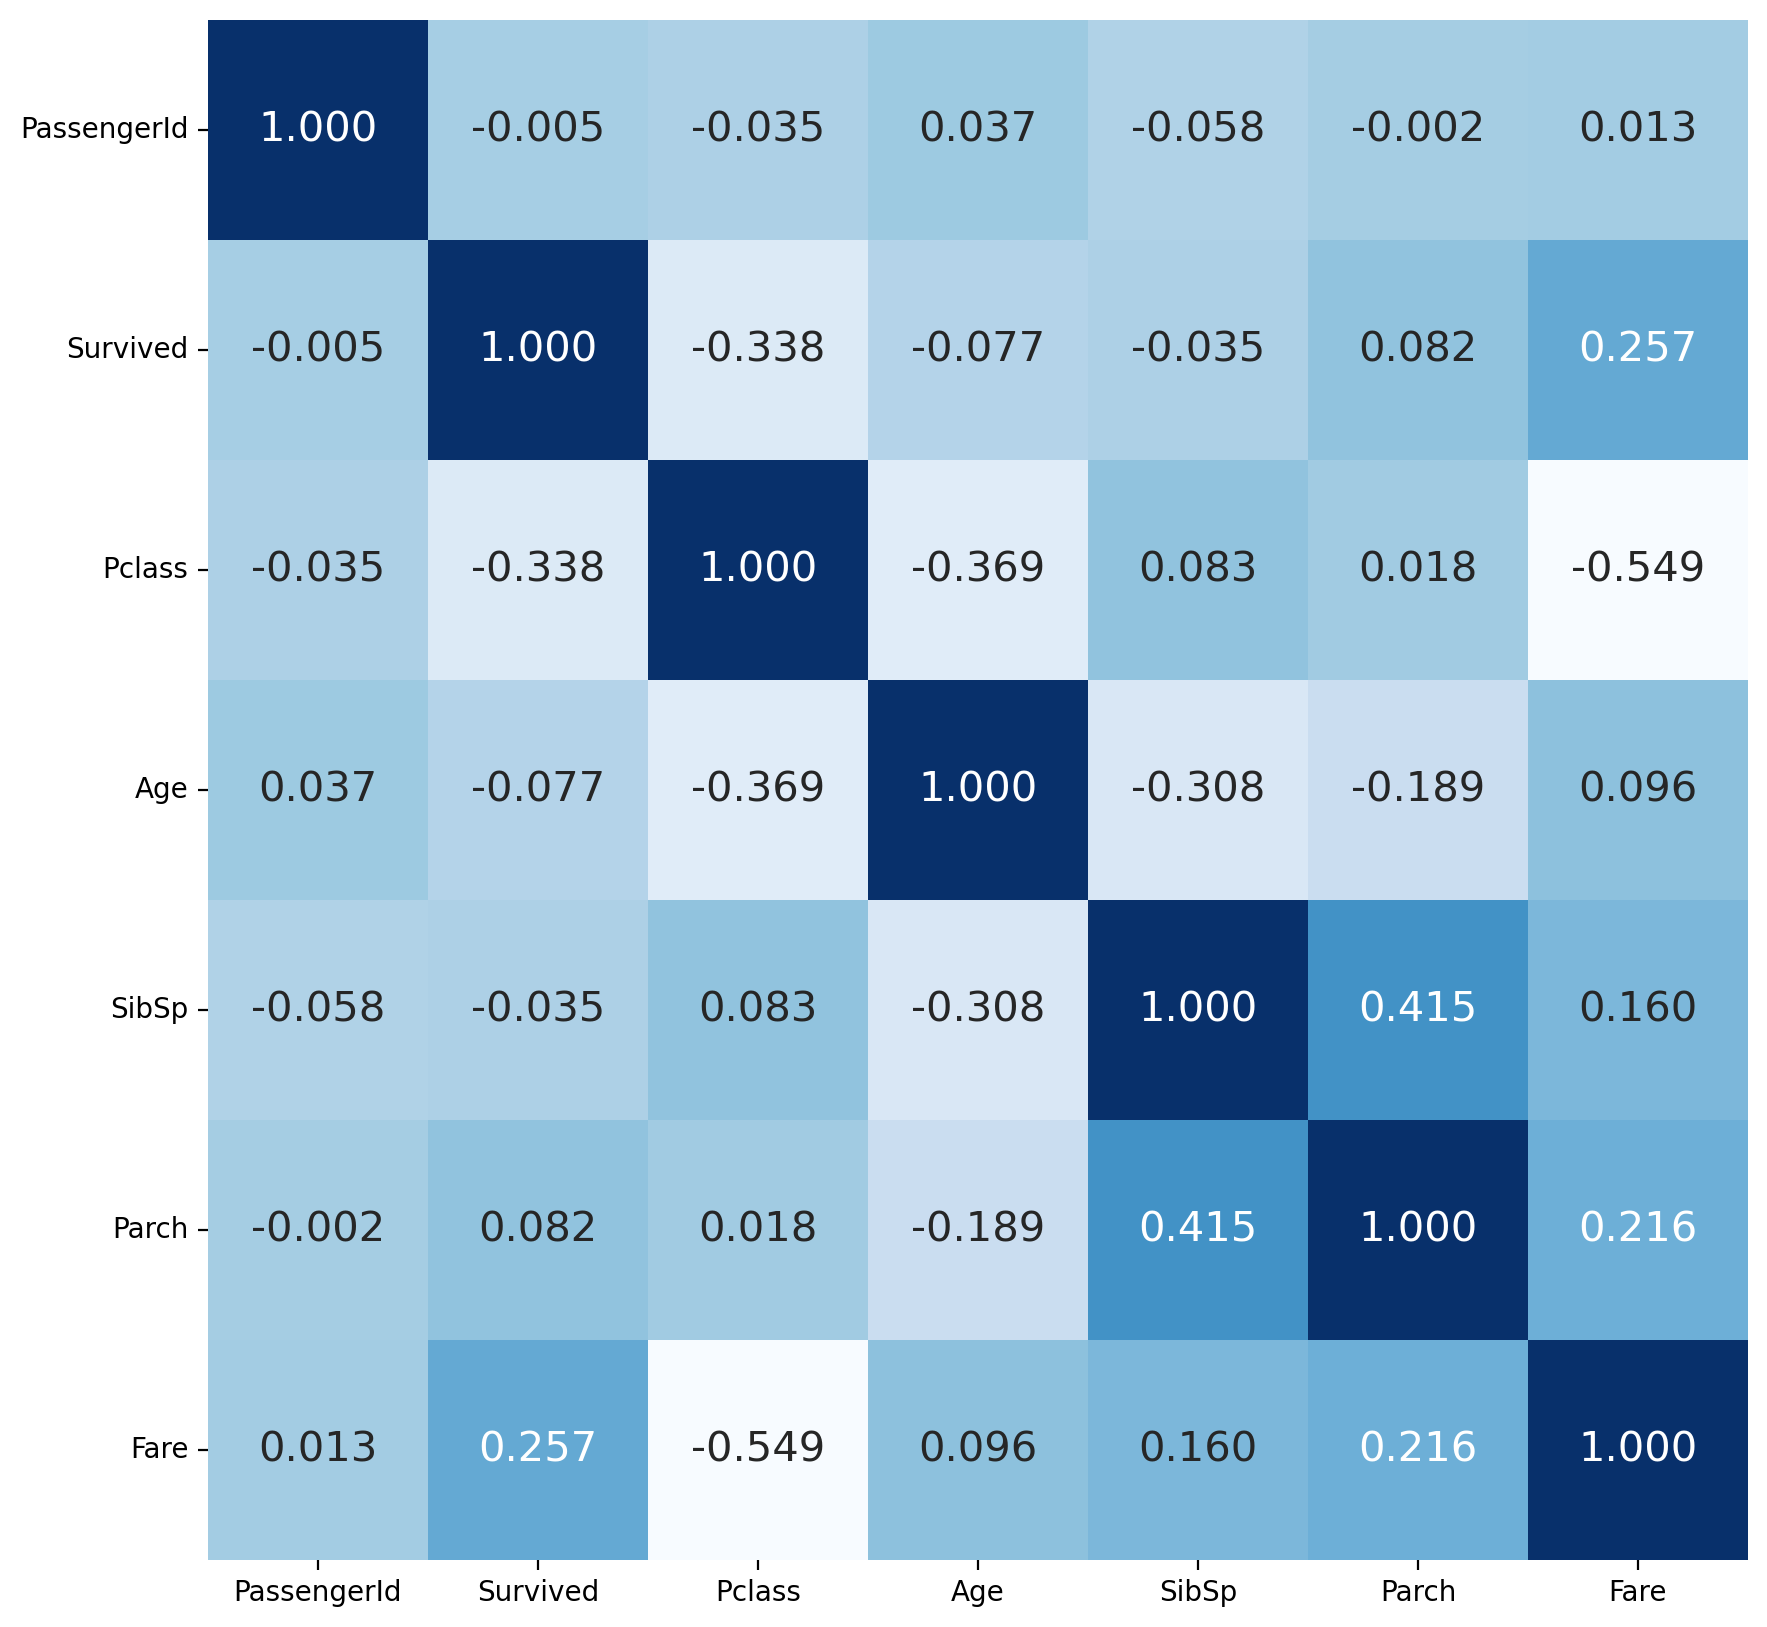

In [474]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),
            annot=True, # 숫자 적기
            cmap='Blues', # 색 변환
            cbar=False, # cbar 없애기
            square=True, # 정사각형
            fmt='.3f', # 소숫점 맞추기
            annot_kws={'size' : 15}) # 안쪽 숫자 크기
plt.yticks(rotation=360)
plt.xticks(rotation=360)
plt.show()

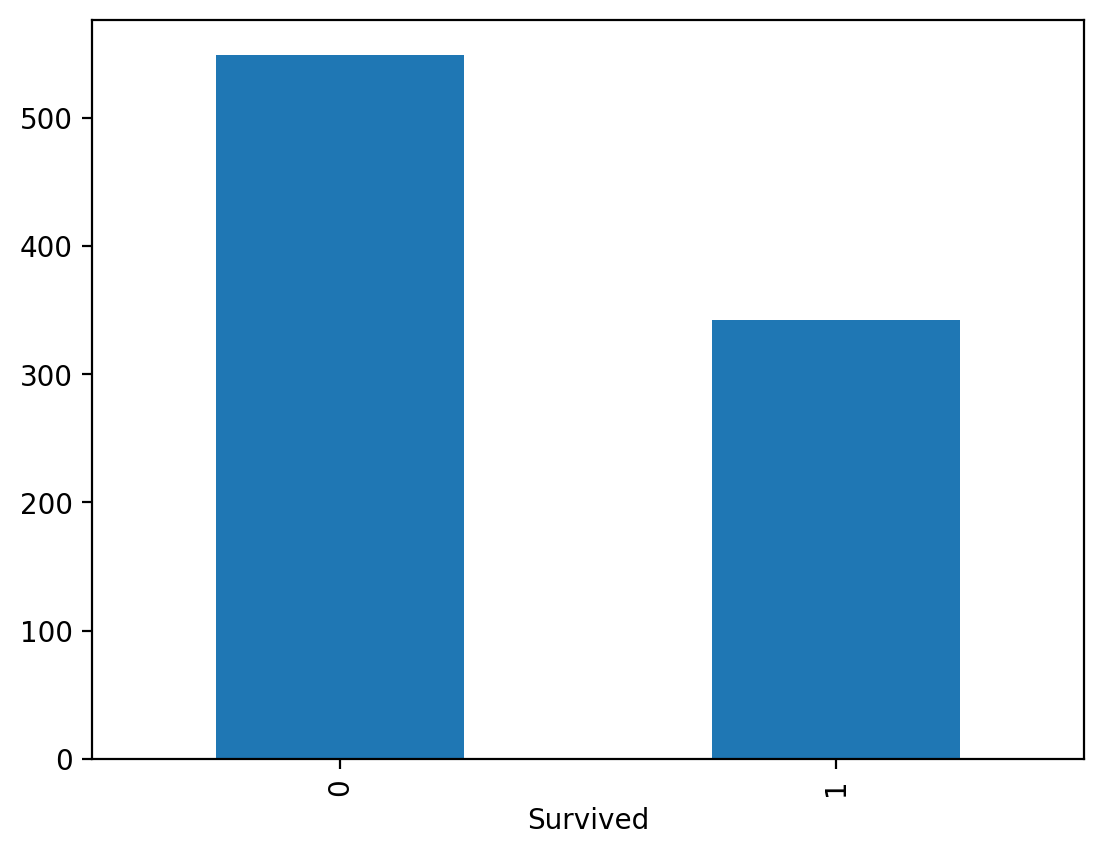

In [476]:
# Target 분포
data['Survived'].value_counts().plot(kind='bar')
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [478]:
# Title 변수 추가
data['Title'] = data['Name'].str.extract('([a-zA-Z]+)\.')

# Other 처리
data.loc[data['Title'].isin(['Mr','Miss','Mrs','Master','Dr'])==False,'Title'] = 'Others'

# 확인
data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     20
Dr          7
Name: count, dtype: int64

In [480]:
# 제거 대상: PassengerId, Name, Ticket, Cabin
drop_cols=['PassengerId','Name','Ticket','Cabin']
data = data.drop(columns=drop_cols)

# 확인
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Others
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


**2) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [482]:
# Title별 Age평균으로 결측치 채우기
title_age = data.groupby(by='Title')['Age'].transform('mean') #trainsform 시리즈로 변경
data['Age'] = data['Age'].fillna(title_age)

In [484]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [191]:
# # Age 결측치를 중앙값으로 채우기
# age_median = data['Age'].median()
# data['Age'] = data['Age'].fillna(age_median)

In [486]:
# Embarked 최빈값 'S'로 채우기
mode_data = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_data)

In [488]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [490]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(columns=target)
y = data.loc[:,target]

**4) 가변수화**

- 범주형 변수를 가변수화 합니다.

In [493]:
# 가변수화 대상: Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Title', 'Embarked']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)

#  확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,0,1,0,0,0,1
1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,0,1,0,0,0,1


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [529]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: KNeighborsClassifier

In [534]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [536]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [538]:
# 3단계: 학습하기
model.fit(x_train,y_train)

KNeighborsClassifier()

In [540]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [544]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(confusion_matrix(y_test,y_pred))

[[141  24]
 [ 50  53]]


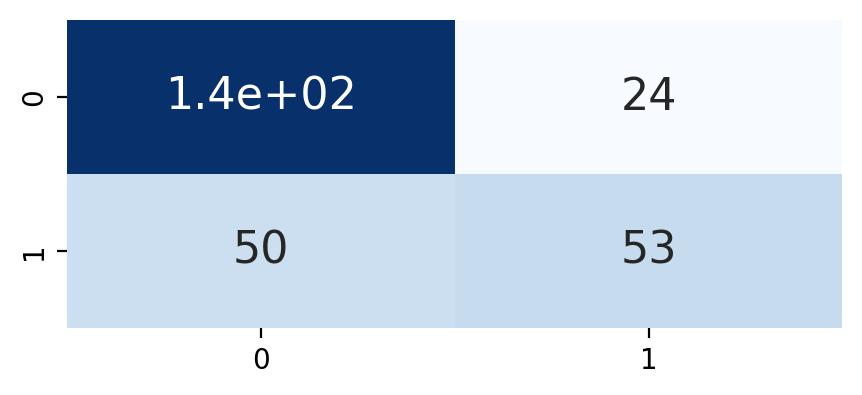

In [546]:
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,
            cbar=False,
            cmap='Blues',
            annot_kws={'size':16})
plt.show()

**2) Accuracy**

In [549]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.7238805970149254


**3) Precision**

In [552]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print('Precision:',precision_score(y_test, y_pred))

Precision: 0.6883116883116883


**4) Recall**

In [555]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print('Recall:',recall_score(y_test, y_pred))

Recall: 0.5145631067961165


**5) F1-Score**

In [558]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print('f1:',f1_score(y_test, y_pred))

f1: 0.5888888888888889


**6) Classification Report**

In [561]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       165
           1       0.69      0.51      0.59       103

    accuracy                           0.72       268
   macro avg       0.71      0.68      0.69       268
weighted avg       0.72      0.72      0.71       268

